                                                                             метод конечных разностей.
визуализация численного решения:


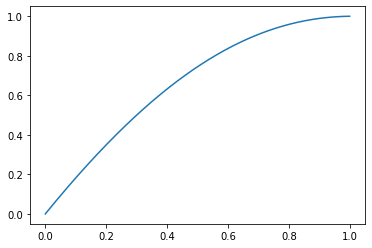

сетка разбиения: 1024.0


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#import pandas as pd
import math
N = 128
a = 0     #2
b = 1     #6
y_a = 0   #4
y_b = 1   #8
ERROR = 1
check = 0
K=0
Y_VECTOR_OLD = np.array([])
X_VECTOR_OLD = np.array([])

while ERROR > 1e-4:
  shag = (b-a)/N
  

  MATRIX = np.array([0*i for i in range((N+1)*(N+1))], float)
  MATRIX = MATRIX.reshape(N+1,-1)
  VECTOR = np.array([i*0 for i in range(N+1)], float)
  VECTOR = VECTOR.reshape(N+1,-1)

  #print(MATRIX)
  # y"+y'(ln(x+2))+ye^(x)=x^3   y(0)=0,y(1)=1

  def A(i):
    x = a + i * shag
    if (i == 0) or (i == N):
      return 0
    else:
      return 1 - ( math.log(x+2) * (shag/2) )
      #return 1 + ( (2/(2*x+1)) * (shag/2) )

  def C(i):
    x = a + i * shag
    if (i == 0) or (i == N):
      return -1
    else:
      return 2 - ( math.exp(x) * shag**2 ) 
      #return 2 - ( ((-12)/((2*x+1)**2)) * shag**2 ) 

  def B(i):
    x = a + i * shag
    if (i == 0) or (i == N):
      return 0
    else:
      return 1 + ( math.log(x+2) * (shag/2) )
      #return 1 - ( (2/(2*x+1)) * (shag/2) )

  def F(i):
    x = a + i * shag
    if i == 0:
      return y_a
    if i == N:
      return y_b
    if (i>0) and (i<N):      
      return x**3 * shag**2
      #return ((3*x+1)/((2*x+1)**2)) * shag**2

  def f(i):
    x = a + i * shag
    return x**3
    #return (3*x+1)/((2*x+1)**2)


  ALFA_VECTOR = np.array([0*i for i in range(N+1)], float)  
  ALFA_VECTOR = ALFA_VECTOR.reshape(N+1,-1)

  BETTA_VECTOR = np.array([0*i for i in range(N+1)], float)
  BETTA_VECTOR = BETTA_VECTOR.reshape(N+1,-1)

  for i in range(N+1):
    if i == 0:
      ALFA_VECTOR[i] = B(0) / C(0)
      BETTA_VECTOR[i] = -(F(0) / C(0))
    else:
      ALFA_VECTOR[i] = B(i) / (C(i) - (ALFA_VECTOR[i-1] * A(i)))
      BETTA_VECTOR[i] = (BETTA_VECTOR[i-1] * A(i) - F(i)) / (C(i) - ALFA_VECTOR[i-1] * A(i))
    #print(A(i),C(i),B(i),F(i), ALFA_VECTOR[i], BETTA_VECTOR[i], i)

  for i in range(N+1):
    if i == 0:
      MATRIX[i,i+1] = B(i)
      MATRIX[i,i] = C(i)
      #print(C(i),B(i))
    if i == N:
      MATRIX[i,i-1] = A(i)
      MATRIX[i,i] = C(i)
      #print(C(i),A(i))
    if (i > 0) and (i < N):
      MATRIX[i,i] = C(i)
      MATRIX[i,i-1] = A(i)
      MATRIX[i,i+1] = B(i)
      #print(C(i),A(i),B(i))
    VECTOR[i] = F(i)
    


  Y_VECTOR = np.array([0*i for i in range(N+1)], float)
  Y_VECTOR = Y_VECTOR.reshape(N+1,-1)
  X_VECTOR = np.array([(a + i * shag) for i in range(N+1)])

  for i in range(N,-1,-1):
    if i == N:
      Y_VECTOR[i] = y_b
    else:
      Y_VECTOR[i] = ALFA_VECTOR[i] * Y_VECTOR[i+1] + BETTA_VECTOR[i]
    #print('yyyyyyyy', Y_VECTOR[i])

    
  if check == 1:
    ERROR = 0
    for i in range(len(Y_VECTOR_OLD)):
      #print(len(Y_VECTOR),len(Y_VECTOR_OLD))
      if (abs(Y_VECTOR[i*2]) > 0) and (abs(Y_VECTOR_OLD[i]) > 0):
        ERROR = ERROR + abs(1 - abs(Y_VECTOR[i*2] / Y_VECTOR_OLD[i]))
        #print(ERROR, Y_VECTOR[i*2],X_VECTOR[i*2] , Y_VECTOR_OLD[i], X_VECTOR_OLD[i])
    #print(ERROR)
  if check == 0:
    check = 1
  Y_VECTOR_OLD = Y_VECTOR
  X_VECTOR_OLD = X_VECTOR
  #(print( Y_VECTOR_OLD , Y_VECTOR))
  N = N * 2
print('                                                                             метод конечных разностей.')
print('визуализация численного решения:')    
plt.plot(X_VECTOR, Y_VECTOR) 
plt.show()
print('сетка разбиения:', N/2)
#print(X_VECTOR[1]/Y_VECTOR[1])

значение знаменателя для формулы Ньютона: 0.5076948396681685
начальное значение производной: 1.889428767579504


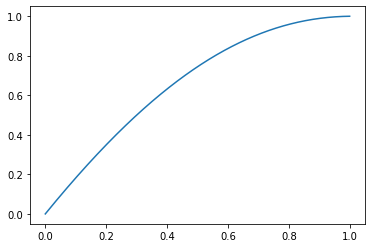

In [41]:
a = 0
b = 1
n = 1024
shag = (b-a) / n
y_a = 0
y_b = 1 
X_GRAF = np.array([(a + i*shag) for i in range(n+1)],float)
def p(x):
  return math.log(2+x)

def q(x):
  return math.exp(x)

def f(x, y, U):
  return x**3 - U * p(x) - y * q(x)

def f1(x, y, y_der):
  return -y_der * p(x) - y * q(x) 

#находим занменатель в методе ньтона 
k_0,k_1,k_2,k_3 = 0,0,0,0
q_0,q_1,q_2,q_3 = 0,0,0,0
z_ = np.array([0*i for i in range(n+1)],float)
x = np.array([(a + i*shag) for i in range(n+1)],float)
z_[0] = 1
U = 1
Y_vector1 = np.array([0])
for i in range(n):
  k_0 = z_[i]
  x_ = x[i]
  U = z_[i]
  y_= Y_vector1[i]
  q_0 = f1(x_,y_,U)
  k_1 = U + (q_0*shag)/2
  q_1 = f1(x_+(shag/2), y_+k_0*(shag/2), U+q_0*(shag/2))
  k_2 = U + q_1*(shag/2)
  q_2 = f1(x_+(shag/2), y_+k_1*(shag/2), U+k_1*(shag/2))
  k_3 = U + q_2*(shag/2)
  q_3 = f1(x_+shag, y_+k_2*shag, U+q_2*shag)
  y_i_1 = y_ + (shag/6)*(k_0+2*k_1+2*k_2+k_3) 
  Y_vector1 = np.append(Y_vector1,y_i_1)
  z_[i+1] = z_[i] + (shag/6)*(q_0+2*q_1+2*q_2+q_3)
  U = z_[i+1]
Y = Y_vector1[n]
print('значение знаменателя для формулы Ньютона:', Y)

def RUNGE_KUTTA_METHOD(S):
  k_0,k_1,k_2,k_3 = 0,0,0,0
  q_0,q_1,q_2,q_3 = 0,0,0,0
  z = np.array([0*i for i in range(n+1)],float)
  x = np.array([(a + i*shag) for i in range(n+1)],float)
  z[0] = S
  U = S
  Y_vector = np.array([0])
  for i in range(n):
    k_0 = z[i]
    x_ = x[i]
    U = z[i]
    y_= Y_vector[i]
    q_0 = f(x_,y_,U)
    k_1 = U + (q_0*shag)/2
    q_1 = f(x_+(shag/2), y_+k_0*(shag/2), U+q_0*(shag/2))
    k_2 = U + q_1*(shag/2)
    q_2 = f(x_+(shag/2), y_+k_1*(shag/2), U+k_1*(shag/2))
    k_3 = U + q_2*(shag/2)
    q_3 = f(x_+shag, y_+k_2*shag, U+q_2*shag)
    y_i_1 = y_ + (shag/6)*(k_0+2*k_1+2*k_2+k_3) 
    Y_vector = np.append(Y_vector,y_i_1)
    z[i+1] = z[i] + (shag/6)*(q_0+2*q_1+2*q_2+q_3)
    U = z[i+1]
  return Y_vector

def NEWTON_METHOD():
  #находим начальное значение производной в точке а
  z = np.array([0*i for i in range(n+1)],float)
  Y_vector = np.array([0])
  FAT = 1
  S__0 = 2
  while FAT > 1e-6:
    YYY = RUNGE_KUTTA_METHOD(S__0)
    S__0 = S__0 - (YYY[n] - y_b)/ Y
    #print(S__0, YYY[n] , y_b, Y)
    FAT = abs(YYY[n] - y_b)
  print('начальное значение производной:', S__0)
  return RUNGE_KUTTA_METHOD(S__0)
Y_GRAF = NEWTON_METHOD()
plt.plot(X_GRAF, Y_GRAF) 
plt.show()
#print(Y_GRAF[n])




график ошибки двух решений для сетки в первом и во втором случае: 1024 1024


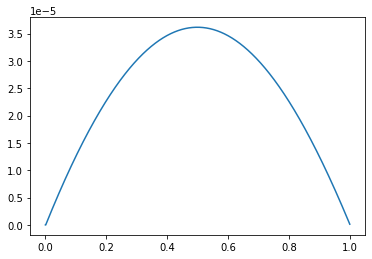

In [42]:
#сравнение методов:
Y_conclusion_ = np.array([0])
summ = 0 
T = int(N/2)
for i in range(T):
  for j in range(n):
    if X_VECTOR[i] == X_GRAF[j]:
      #summ = summ + abs(Y_VECTOR[i] - Y_GRAF[j])
      Y_conclusion_ = np.append(Y_conclusion_, abs(Y_VECTOR[i] - Y_GRAF[j]))
#print('погрешность между двумя методами:', summ)       #смысла в этом нет 
#plt.plot(X_VECTOR, Y_VECTOR) 
#plt.plot(X_GRAF, Y_GRAF)
#plt.show()
print('график ошибки двух решений для сетки в первом и во втором случае:', T,n)
plt.plot(X_GRAF, Y_conclusion_)
plt.show()

погрешность и значение производной в нуле: -1.6653345369377348e-15 1.889428767579501


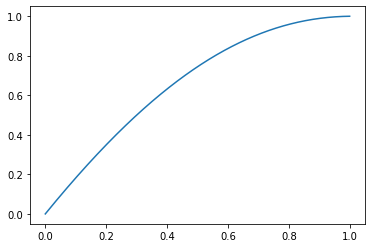

0.9999999999999983


In [60]:
S_1 = 10
S_2 = 0



def FI(S):
  k_0,k_1,k_2,k_3 = 0,0,0,0
  q_0,q_1,q_2,q_3 = 0,0,0,0
  z = np.array([0*i for i in range(n+1)],float)
  x = np.array([(a + i*shag) for i in range(n+1)],float)
  z[0] = S
  U = S
  Y_vector__ = np.array([0])
  for i in range(n):
    k_0 = z[i]
    x_ = x[i]
    U = z[i]
    y_= Y_vector__[i]
    q_0 = f(x_,y_,U)
    k_1 = U + (q_0*shag)/2
    q_1 = f(x_+(shag/2), y_+k_0*(shag/2), U+q_0*(shag/2))
    k_2 = U + q_1*(shag/2)
    q_2 = f(x_+(shag/2), y_+k_1*(shag/2), U+k_1*(shag/2))
    k_3 = U + q_2*(shag/2)
    q_3 = f(x_+shag, y_+k_2*shag, U+q_2*shag)
    y_i_1 = y_ + (shag/6)*(k_0+2*k_1+2*k_2+k_3) 
    Y_vector__ = np.append(Y_vector__,y_i_1)
    z[i+1] = z[i] + (shag/6)*(q_0+2*q_1+2*q_2+q_3)
    U = z[i+1]
  return Y_vector__[n] - y_b

TEST = FI(1)
while abs(TEST) > 1e-10:
  S = S_2 - FI(S_2) * ((S_2 - S_1) / (FI(S_2) - FI(S_1)))
  check = S_2
  S_2 = S
  S_1 = check
  TEST = FI(S)
  print('погрешность и значение производной в нуле:', FI(S), S)



#k_0,k_1,k_2,k_3 = 0,0,0,0
#q_0,q_1,q_2,q_3 = 0,0,0,0
#z = np.array([0*i for i in range(n+1)],float)
#x = np.array([(a + i*shag) for i in range(n+1)],float)
#z[0] = S
#U = S
#Y_vector__ = np.array([0])
#for i in range(n):
  #k_0 = z[i]
  #x_ = x[i]
  #U = z[i]
  #y_= Y_vector__[i]
  #q_0 = f(x_,y_,U)
  #k_1 = U + (q_0*shag)/2
  #q_1 = f(x_+(shag/2), y_+k_0*(shag/2), U+q_0*(shag/2))
  #k_2 = U + q_1*(shag/2)
  #q_2 = f(x_+(shag/2), y_+k_1*(shag/2), U+k_1*(shag/2))
  #k_3 = U + q_2*(shag/2)
  #q_3 = f(x_+shag, y_+k_2*shag, U+q_2*shag)
  #y_i_1 = y_ + (shag/6)*(k_0+2*k_1+2*k_2+k_3) 
  #Y_vector__ = np.append(Y_vector__,y_i_1)
  #z[i+1] = z[i] + (shag/6)*(q_0+2*q_1+2*q_2+q_3)
  #U = z[i+1]
Y_vector__ = RUNGE_KUTTA_METHOD(S)
plt.plot(x, Y_vector__)
plt.show()
#print(GRAF_FUNC(S))
#print(Y_vector__[n])
                               

график ошибки двух решений для сетки в первом и во втором случае: 1024 1024


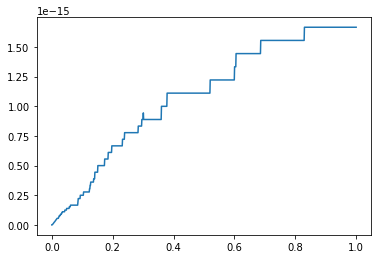

0.9999999999999983 1.0


In [61]:
#сравнение методов:
Y_conclusion_ = np.array([0])
summ = 0 
T = int(N/2)
for i in range(T):
  for j in range(n):
    if x[i] == X_GRAF[j]:
      #summ = summ + abs(Y_VECTOR[i] - Y_GRAF[j])
      Y_conclusion_ = np.append(Y_conclusion_, abs(Y_vector__[i] - Y_GRAF[j]))
#print('погрешность между двумя методами:', summ)       #смысла в этом нет 
#plt.plot(X_VECTOR, Y_VECTOR) 
#plt.plot(X_GRAF, Y_GRAF)
#plt.show()

print('график ошибки двух решений для сетки в первом и во втором случае:', T,n)
plt.plot(X_GRAF, Y_conclusion_)
plt.show()
print(Y_vector__[n],Y_GRAF[n])